# California Housing Exploratory Data Analysis

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

print(type(california))

<class 'sklearn.utils._bunch.Bunch'>


In [ ]:
import pandas as pd

pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', 9)
pd.set_option('display.width', None)

# Tranform the Dataset into Pandas DataFrames

In [ ]:
y = pd.DataFrame(california.target, columns=['MedHouseValue'])

X = pd.DataFrame(california.data, columns=california.feature_names)

X.to_csv('X.csv', index=False)
y.to_csv('y.csv', index=False)

# Combine to One Overall Pandas DataFrame for EDA

In [ ]:
california_df = pd.DataFrame(california.data, columns=california.feature_names)

california_df['MedHouseValue'] = y

california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.9841,1.0238,322.0,2.5556,37.88,-122.23,4.526
1,8.3014,21.0,6.2381,0.9719,2401.0,2.1098,37.86,-122.22,3.585
2,7.2574,52.0,8.2881,1.0734,496.0,2.8023,37.85,-122.24,3.521
3,5.6431,52.0,5.8174,1.0731,558.0,2.5479,37.85,-122.25,3.413
4,3.8462,52.0,6.2819,1.0811,565.0,2.1815,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.0455,1.1333,845.0,2.5606,39.48,-121.09,0.781
20636,2.5568,18.0,6.1140,1.3158,356.0,3.1228,39.49,-121.21,0.771
20637,1.7000,17.0,5.2055,1.1201,1007.0,2.3256,39.43,-121.22,0.923
20638,1.8672,18.0,5.3295,1.1719,741.0,2.1232,39.43,-121.32,0.847


# Scatterplot Matrix Plot (Features vs the Ouput Targets (Meidan House Price))

It can be seen from the scatterplot matirix that MedInc and MedHouseVale have a good linear relationship with each other. Therefore, MedInc is the best feature to use for simple linear regression that makes predictions with only one feature as opposed to more than one feature in multiple linea rergression.

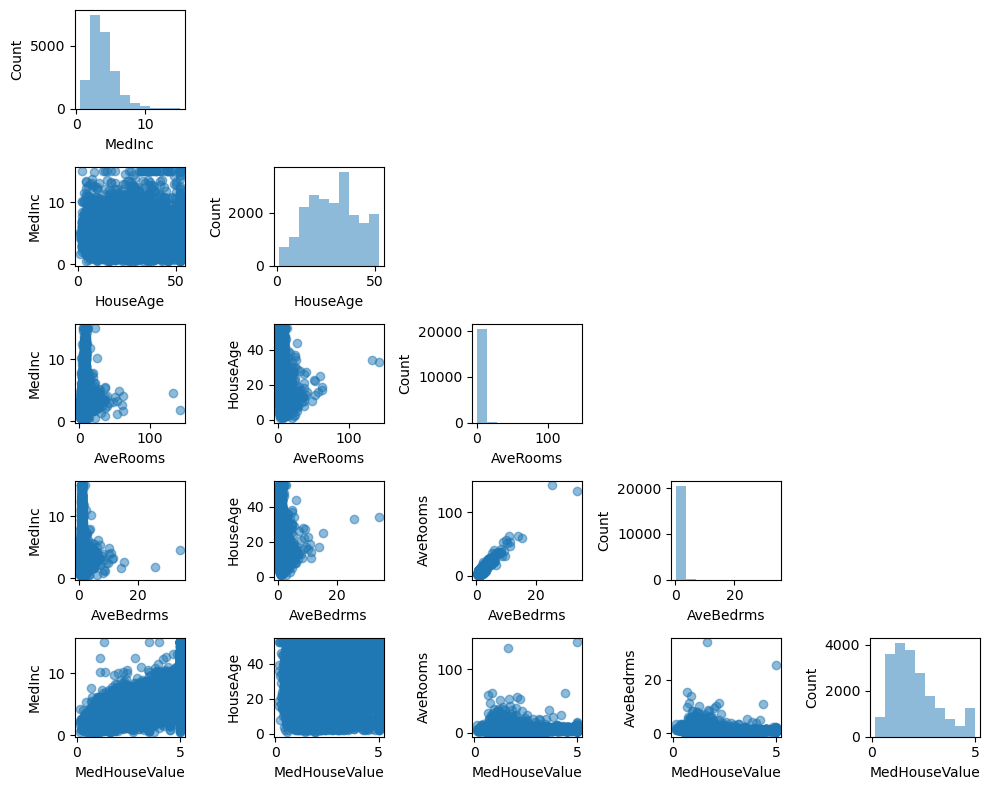

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'MedHouseValue']

scatterplotmatrix(california_df[cols].values, figsize=(10, 8),
                  names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

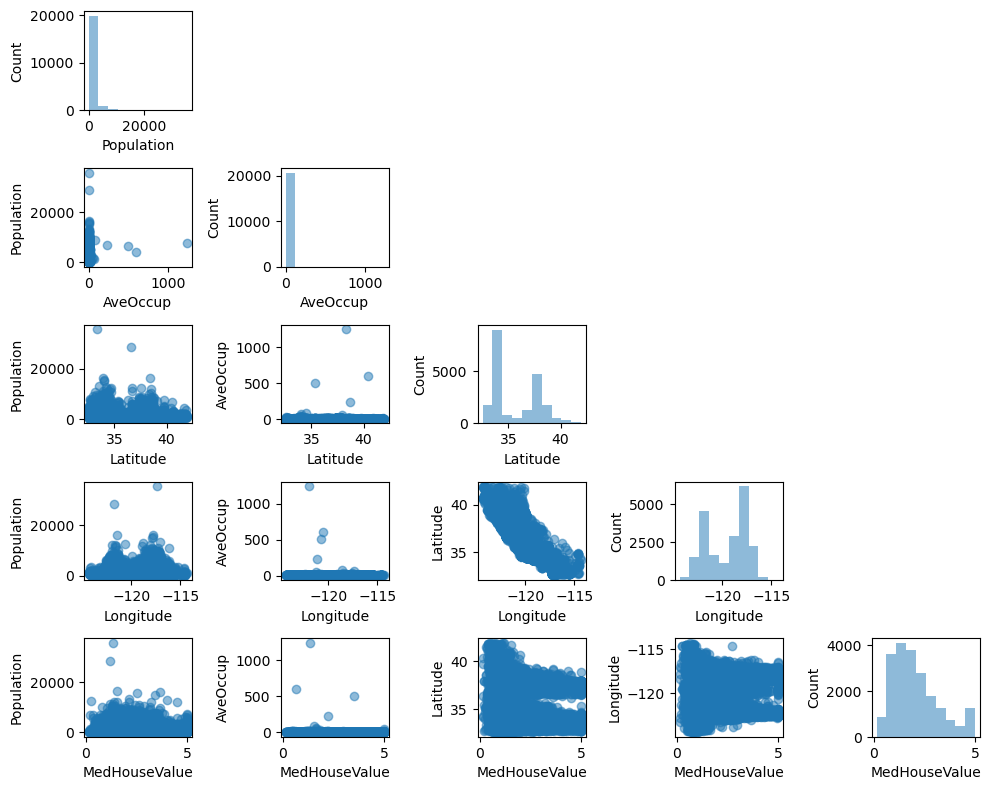

In [ ]:
cols = ['Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseValue']

scatterplotmatrix(california_df[cols].values, figsize=(10, 8),
                  names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

# Scatterplot (Target (Median House Price) vs Each Feature)

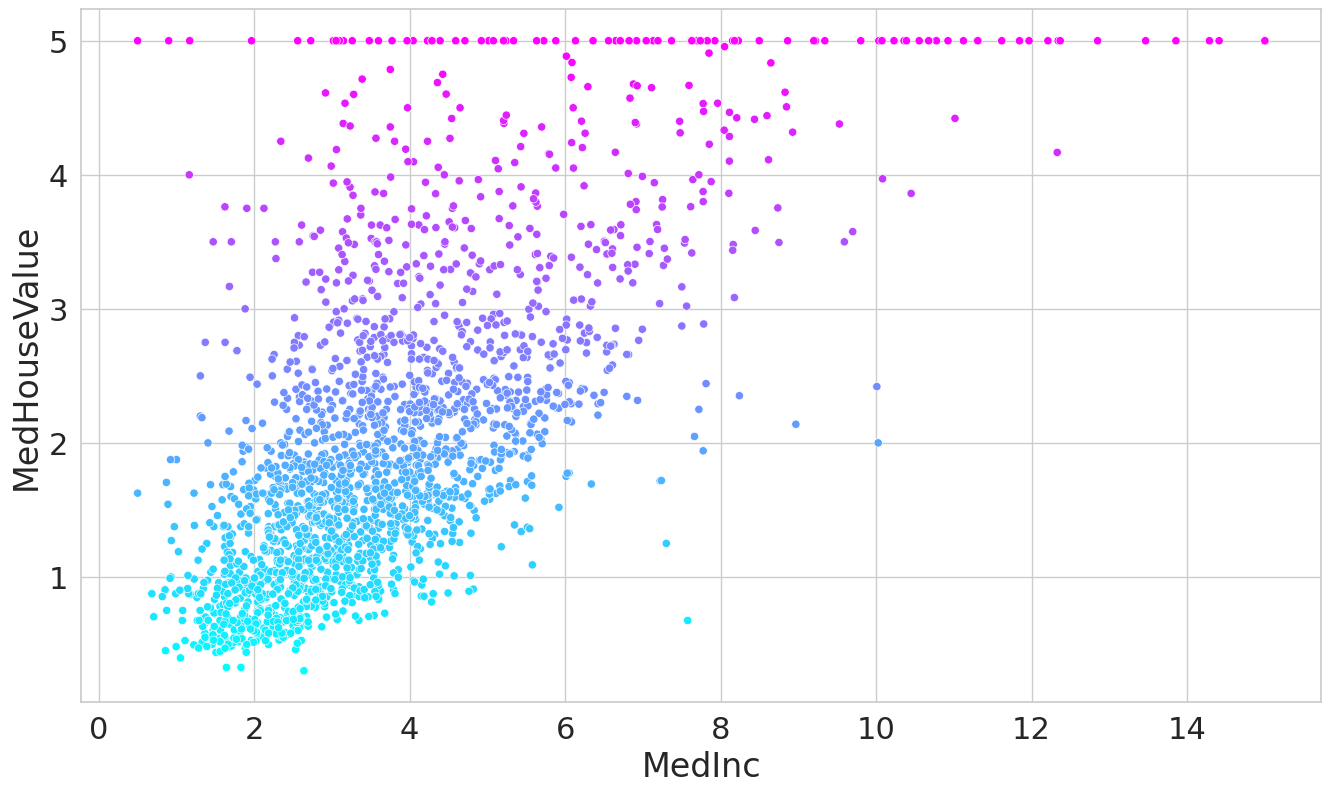

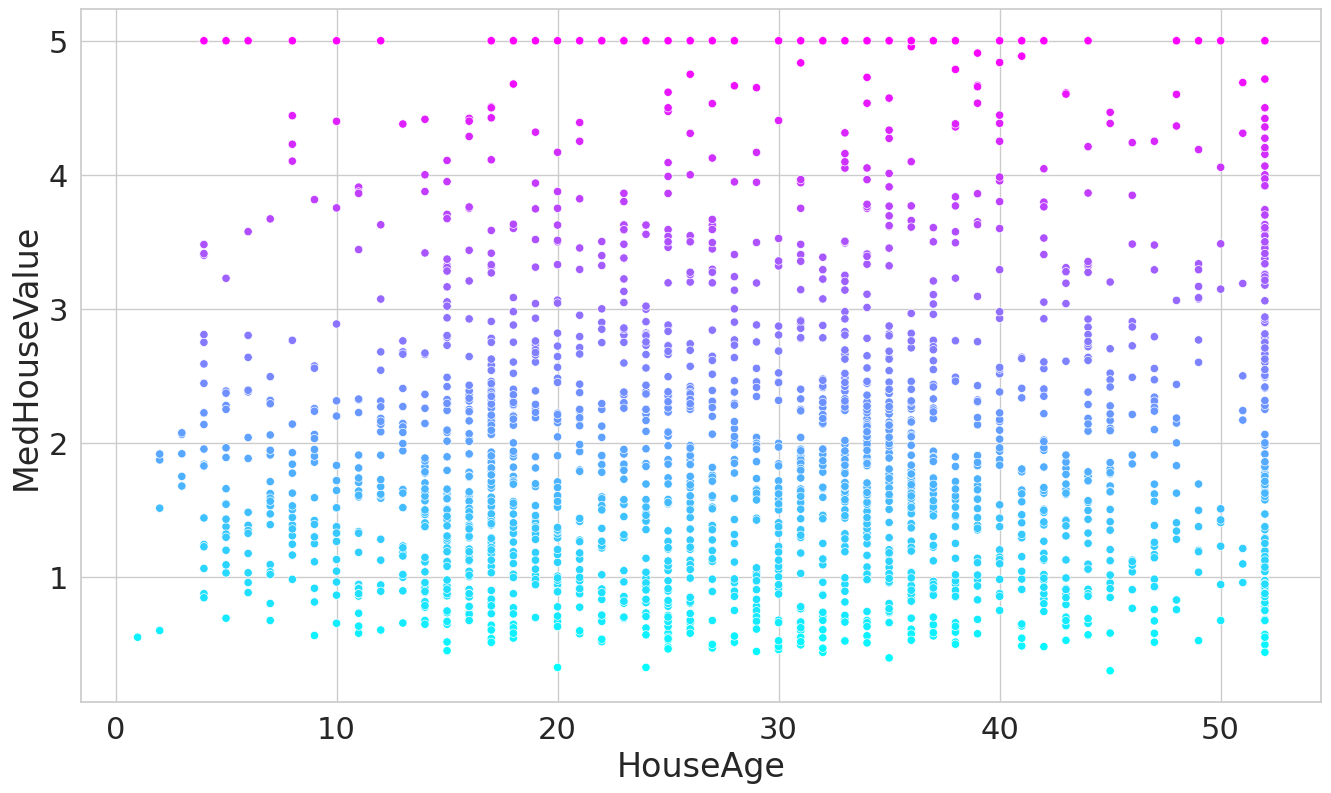

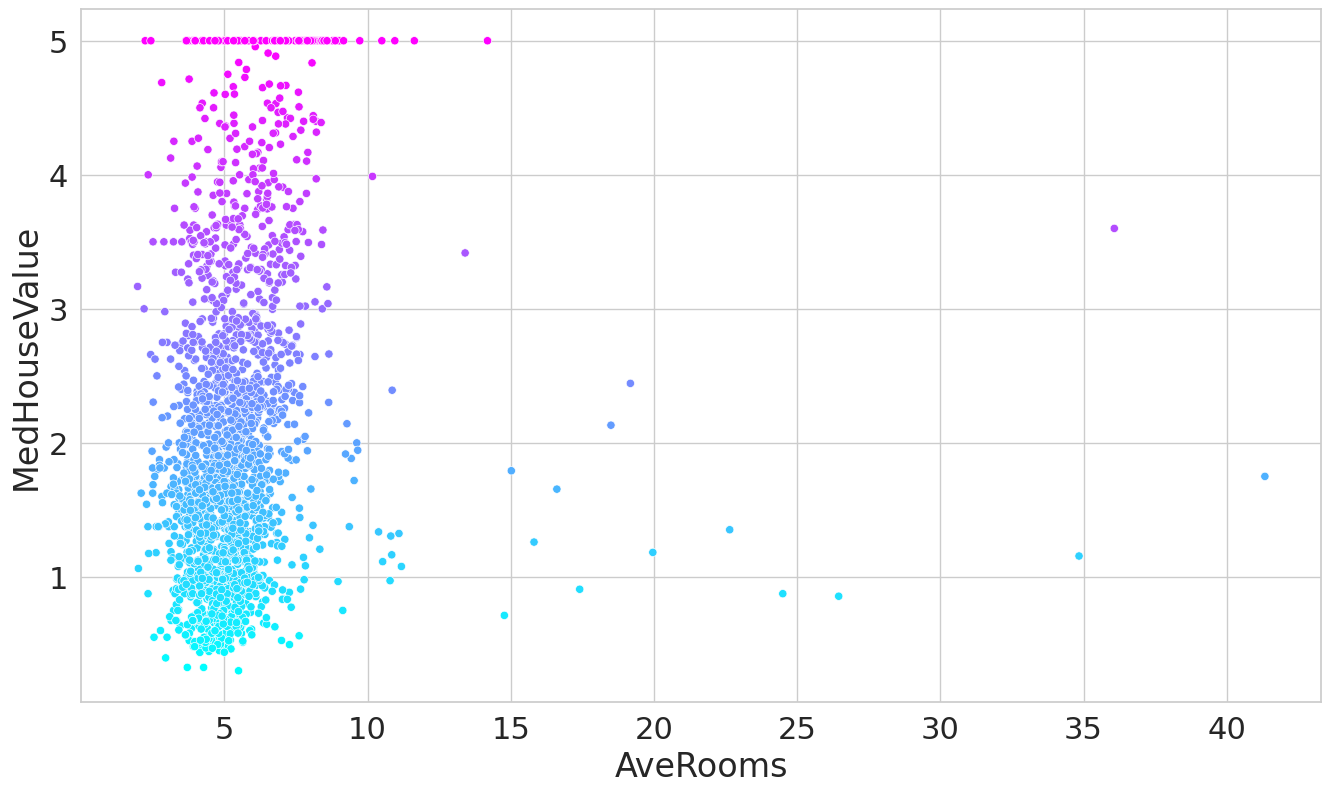

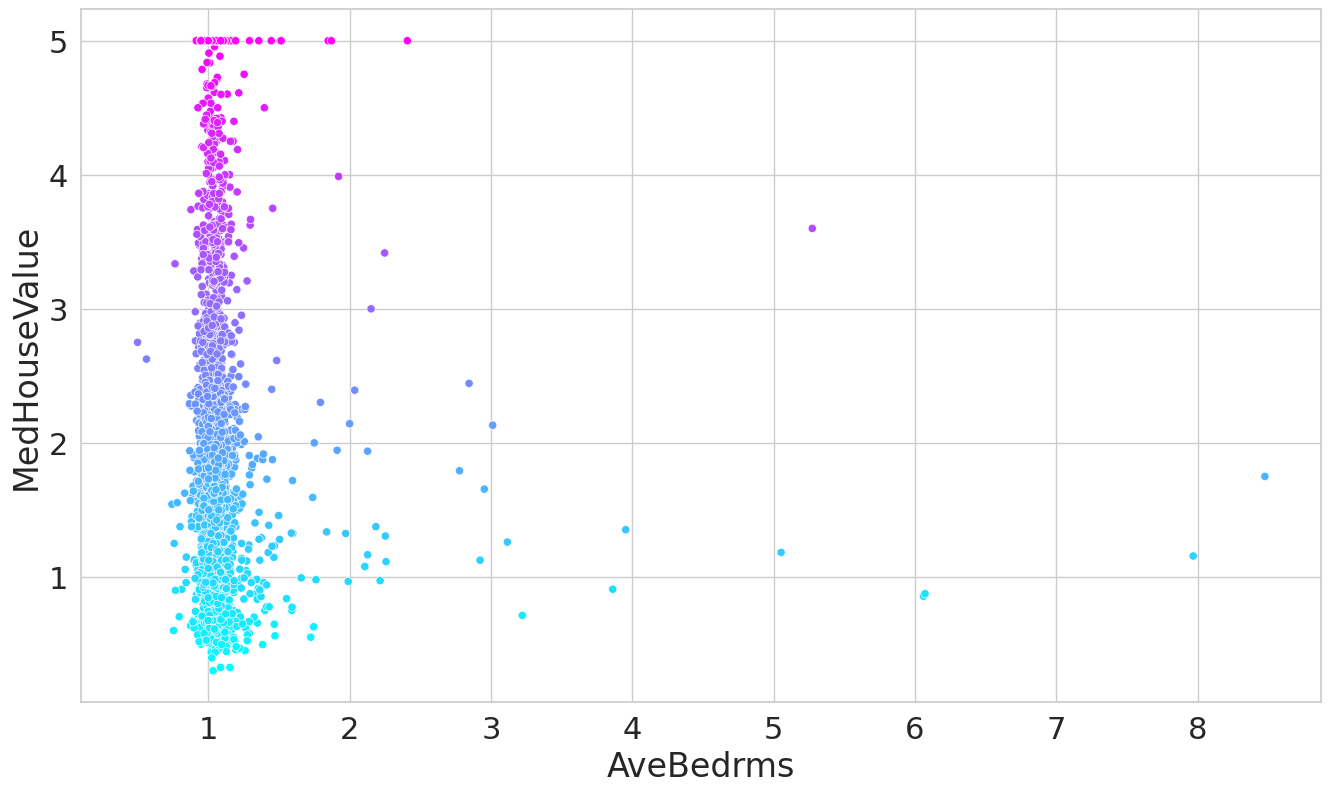

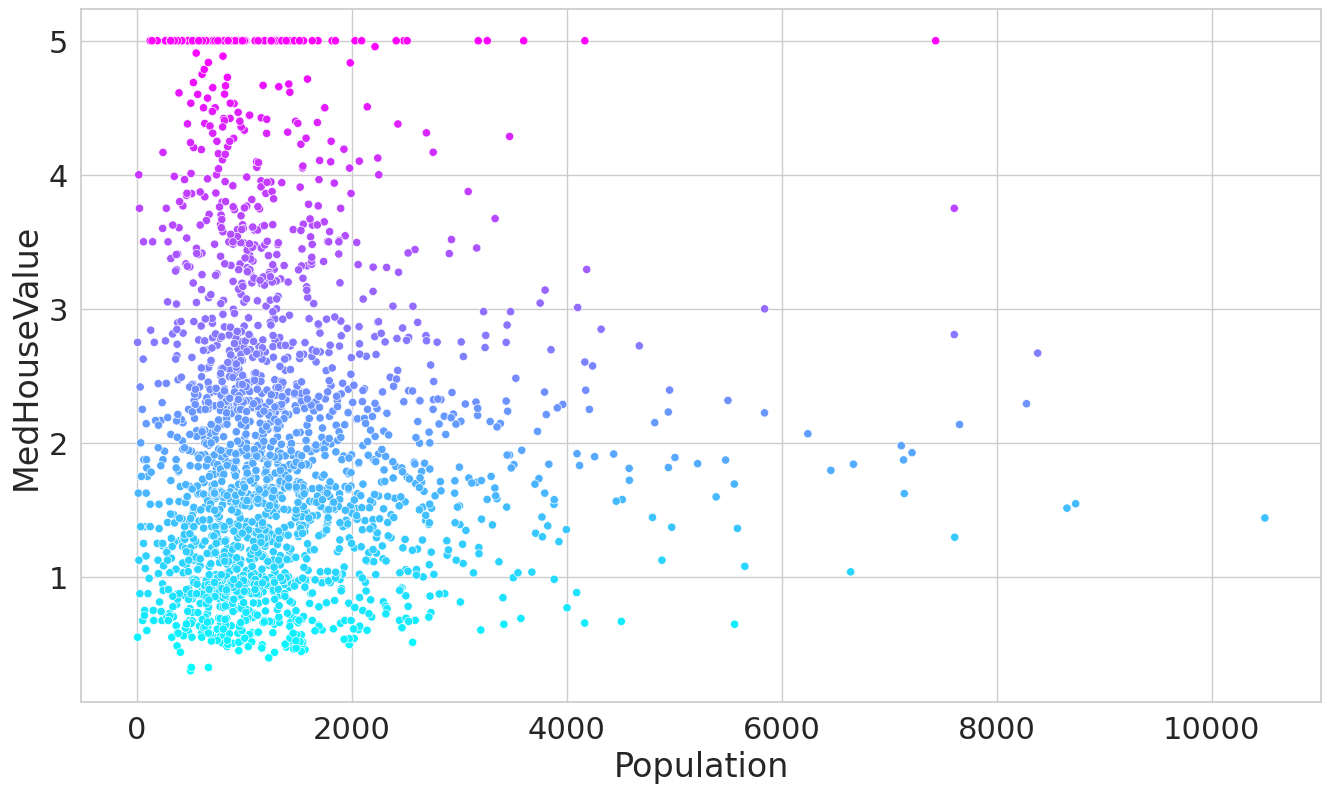

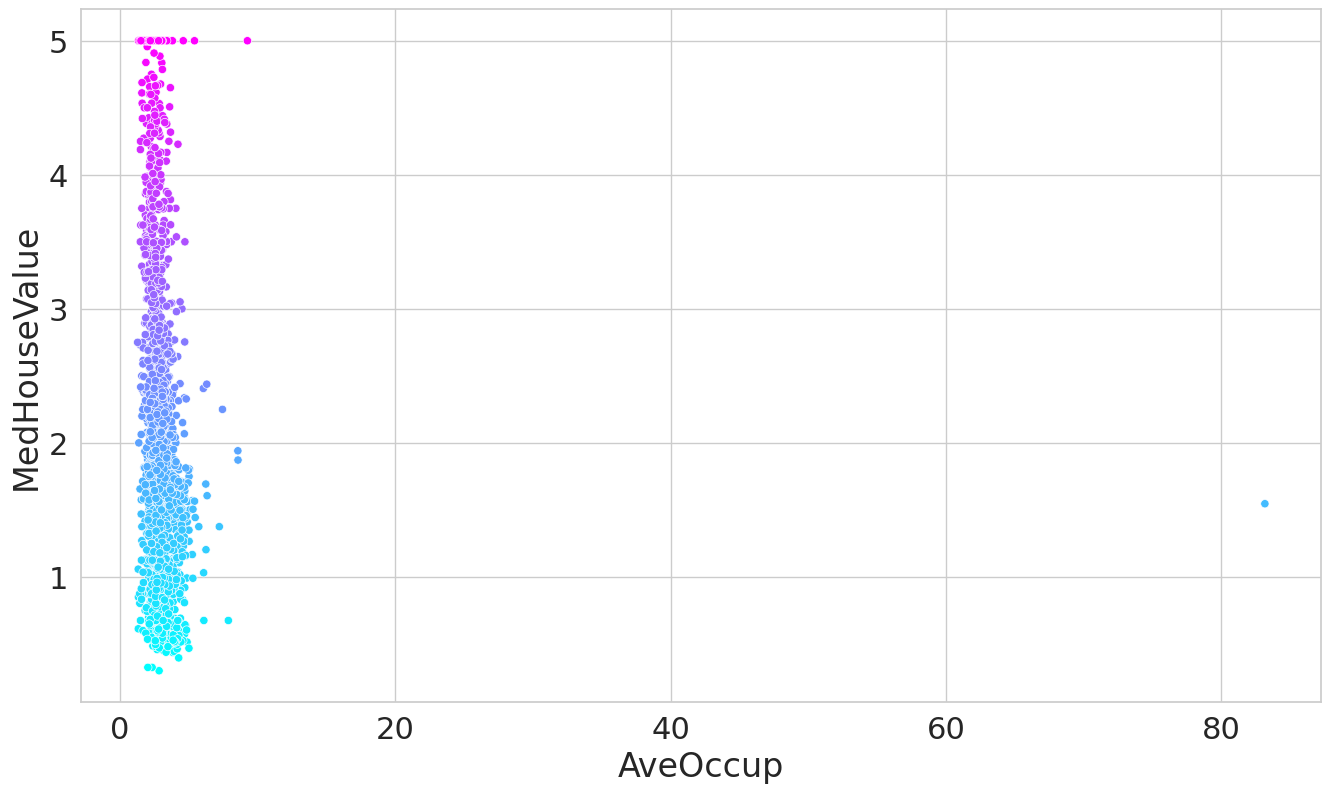

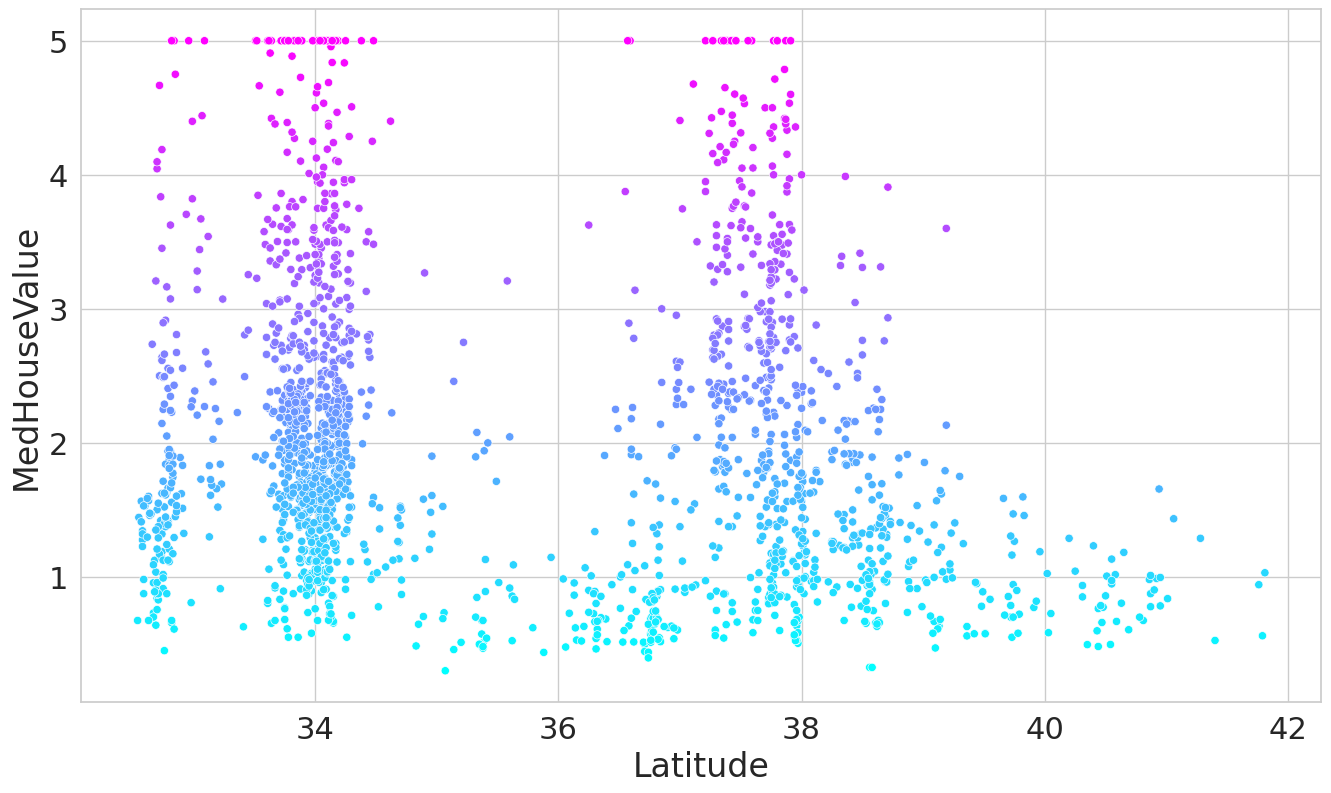

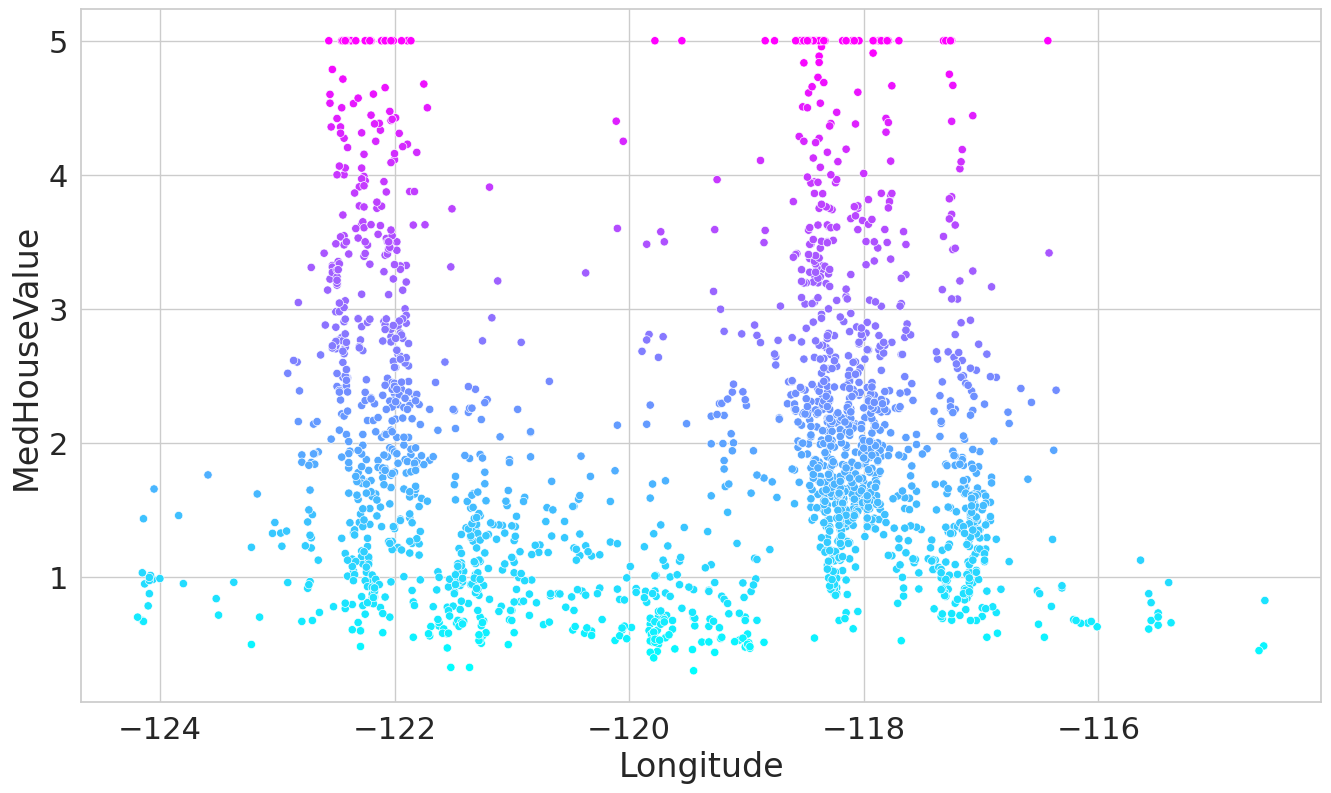

In [ ]:
sample_df = california_df.sample(frac=0.1, random_state=42)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)
sns.set_style('whitegrid')

for feature in california.feature_names:
    plt.figure(figsize=(16, 9))
    sns.scatterplot(data=sample_df, x=feature,
                    y='MedHouseValue', hue='MedHouseValue',
                    palette='cool', legend=False)

# Feature to Targets Correlation Coefficient Plot

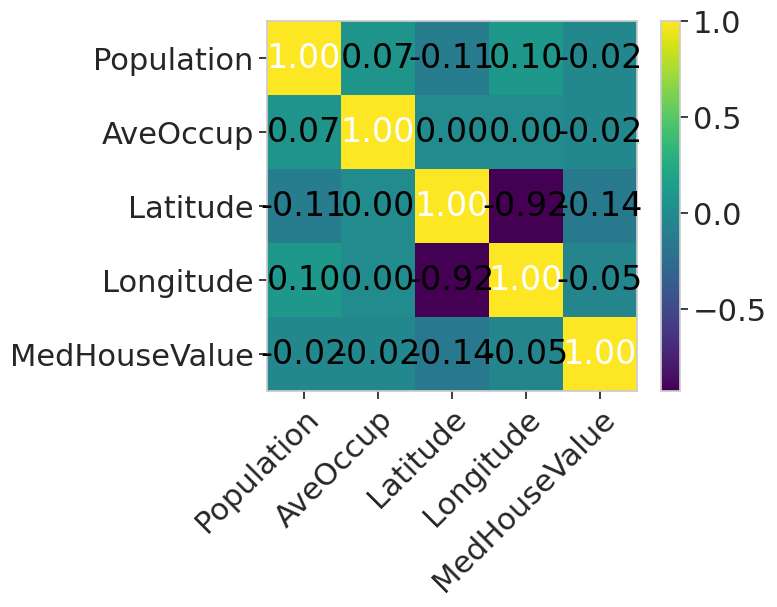

In [ ]:
import numpy as np
from mlxtend.plotting import heatmap


cm = np.corrcoef(california_df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)

plt.show()

# California Housing Dataset Feature Statistics Pandas DataFrame

In [ ]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,3.8707,28.6395,5.4290,1.0967,1425.4767,3.0707,35.6319,-119.5697,2.0686
std,1.8998,12.5856,2.4742,0.4739,1132.4621,10.3860,2.1360,2.0035,1.1540
min,0.4999,1.0000,0.8462,0.3333,3.0000,0.6923,32.5400,-124.3500,0.1500
25%,2.5634,18.0000,4.4407,1.0061,787.0000,2.4297,33.9300,-121.8000,1.1960
50%,3.5348,29.0000,5.2291,1.0488,1166.0000,2.8181,34.2600,-118.4900,1.7970
75%,4.7432,37.0000,6.0524,1.0995,1725.0000,3.2823,37.7100,-118.0100,2.6472
max,15.0001,52.0000,141.9091,34.0667,35682.0000,1243.3333,41.9500,-114.3100,5.0000


In [ ]:
%whos

Variable                   Type         Data/Info
-------------------------------------------------
X                          DataFrame           MedInc  HouseAge  <...>n[20640 rows x 8 columns]
california                 Bunch        {'data': array([[   8.325<...>rs, 33 (1997) 291-297\n'}
california_df              DataFrame           MedInc  HouseAge  <...>n[20640 rows x 9 columns]
cm                         ndarray      5x5: 25 elems, type `float64`, 200 bytes
cols                       list         n=5
feature                    str          Longitude
fetch_california_housing   function     <function fetch_californi<...>ousing at 0x717bf8c73060>
heatmap                    function     <function heatmap at 0x717bf7794540>
hm                         tuple        n=2
np                         module       <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
pd                         module       <module 'pandas' from '/h<...>ages/pandas/__init__.py'>
plt                        m